In [24]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [25]:
np.random.seed(1)

In [42]:
def rnorm(number_of_elements, mean=0, variance_squared=1): 
    return math.sqrt(variance_squared) * np.random.randn(number_of_elements) + mean

## Ex a)

In [70]:
np.random.uniform(size=10)

array([0.69063908, 0.05756762, 0.16076414, 0.71623831, 0.9706187 ,
       0.92955038, 0.90106699, 0.12774331, 0.14592892, 0.07226476])

In [66]:
x1 = np.random.uniform(size=100)
x2 = [0.5 * x + 0.1 * e for x, e in zip(x1, rnorm(100))]
y = [2 + 2 * x_1 + 0.3 * x_2 + e for x_1, x_2, e in zip(x1, x2, rnorm(100))]

$Y = 2 + 2 \cdot X_1 + 0.3 \cdot X_2 + e$

$\beta_0 = 2, \beta_1=2, \beta_2=0.3$


## Ex b)

In [67]:
data = {'x1': x1, 'x2': x2}
df = pd.DataFrame(data)
df.corr()

,x1,x2
x1,1.000000,0.819726
x2,0.819726,1.000000


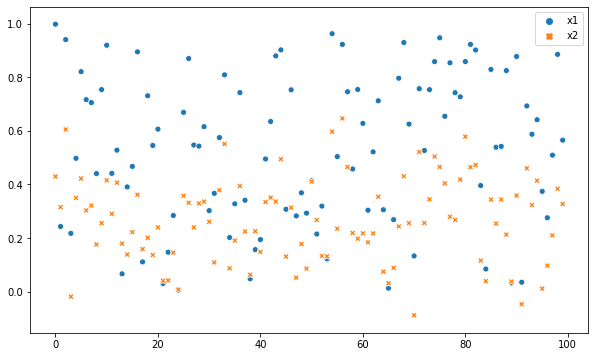

In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df)

## Ex c)

In [72]:
model = sm.OLS.from_formula('y ~ x1 + x2', data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     30.87
Date:                Sun, 03 Nov 2019   Prob (F-statistic):           4.22e-11
Time:                        13:23:31   Log-Likelihood:                -139.27
No. Observations:                 100   AIC:                             284.5
Df Residuals:                      97   BIC:                             292.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5859      0.216      7.338      0.0

0.5191393735482674

## Ex d)

In [20]:
model = sm.OLS.from_formula('y ~ x1', data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     28.26
Date:                Sun, 03 Nov 2019   Prob (F-statistic):           6.68e-07
Time:                        11:56:43   Log-Likelihood:                -144.76
No. Observations:                 100   AIC:                             293.5
Df Residuals:                      98   BIC:                             298.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2486      0.201     11.209      0.0

Can we reject null hypothesis H_0: \beta_1 = 0?

In [51]:
results.pvalues['x1'] * 100

0.5150416964904961

## Ex e)

In [19]:
model = sm.OLS.from_formula('y ~ x2', data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     32.87
Date:                Sun, 03 Nov 2019   Prob (F-statistic):           1.09e-07
Time:                        11:56:42   Log-Likelihood:                -142.97
No. Observations:                 100   AIC:                             289.9
Df Residuals:                      98   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2655      0.187     12.145      0.0

## Ex f)

## Ex g)

In [52]:
x1 = np.append(x1, 0.1)
x2 = np.append(x2, 0.8)
y = np.append(y, 6)

In [53]:
data = {'x1': x1, 'x2': x2}
df = pd.DataFrame(data)
df.corr()

,x1,x2
x1,1.000000,0.697591
x2,0.697591,1.000000


### y = x1 + x2

In [54]:
model = sm.OLS.from_formula('y ~ x1 + x2', data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     19.31
Date:                Sun, 03 Nov 2019   Prob (F-statistic):           8.49e-08
Time:                        13:17:43   Log-Likelihood:                -153.06
No. Observations:                 101   AIC:                             312.1
Df Residuals:                      98   BIC:                             320.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8155      0.246      7.382      0.0

### y = x1

In [55]:
model = sm.OLS.from_formula('y ~ x1', data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     27.77
Date:                Sun, 03 Nov 2019   Prob (F-statistic):           8.01e-07
Time:                        13:17:46   Log-Likelihood:                -157.36
No. Observations:                 101   AIC:                             318.7
Df Residuals:                      99   BIC:                             323.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8598      0.255      7.298      0.0

### y = x2

In [56]:
model = sm.OLS.from_formula('y ~ x2', data)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     34.30
Date:                Sun, 03 Nov 2019   Prob (F-statistic):           6.17e-08
Time:                        13:17:51   Log-Likelihood:                -154.82
No. Observations:                 101   AIC:                             313.6
Df Residuals:                      99   BIC:                             318.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0879      0.200     10.432      0.0